In [20]:
employees = [['John Smith', '0873783883', 1500],
             ['Mary Simons', '0ET3783884', 2500],
             ['', '01897882GGG', 100],
             ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkk', '09712723823', 1200],
             ['Henry Dawnson', '0977628282', 900],
             ['', '01872832823', 500]]

In [7]:
def clean_employees(employees, fix_name, fix_phone, fix_salary):
    for e in employees:
        fix_name(e)
        fix_phone(e)
        fix_salary(e)

In [5]:
def fix_empty_name(e):
    if e[0] == '':
        e[0] = 'John Doe'
def fix_nothing(e):
    pass

def fix_long_name(e):
    if len(e[0]) > 20:
        e[0] = e[0][:20]

clean_employees(employees, fix_empty_name, fix_nothing, fix_nothing)
print(employees)
clean_employees(employees, fix_long_name, fix_nothing, fix_nothing)
print(employees)

[['John Smith', '0873783883', 1500], ['Mary Simons', '0ET3783884', 2500], ['John Doe', '01897882GGG', 100], ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkk', '09712723823', 1200], ['Henry Dawnson', '0977628282', 900], ['John Doe', '01872832823', 500]]
[['John Smith', '0873783883', 1500], ['Mary Simons', '0ET3783884', 2500], ['John Doe', '01897882GGG', 100], ['Adam Blackkkkkkkkkkk', '09712723823', 1200], ['Henry Dawnson', '0977628282', 900], ['John Doe', '01872832823', 500]]


In [8]:
def fix_phone(e):
    phone = [c if c.isdigit() else '0' for c in e[1]]
    e[1] = ''.join(phone)
clean_employees(employees, fix_nothing, fix_phone, fix_nothing)
print(employees)

[['John Smith', '0873783883', 1500], ['Mary Simons', '0003783884', 2500], ['John Doe', '01897882000', 100], ['Adam Blackkkkkkkkkkk', '09712723823', 1200], ['Henry Dawnson', '0977628282', 900], ['John Doe', '01872832823', 500]]


In [17]:
# Valid salary is in range [200, 2000]. 
# Any invalid salary should change to 200 or 2000
def fix_salary(e):
    if e[2] < 200:
        e[2] = 200
    elif e[2] > 2000:
        e[2] = 2000
#clean_employees(employees, fix_nothing, fix_nothing, fix_salary)
#print(employees)
# Valid salary is in range [200, 2000]. 
# Any invalid salary should change to mean of valid salary
valid_salaries = [e[2] for e in employees if 200 <= e[2] <= 2000]
mean_salary = sum(valid_salaries) // len(valid_salaries)
def fix_salary_by_mean(e):
    if e[2] < 200 or e[2] > 2000:
        e[2] = mean_salary
clean_employees(employees, fix_nothing, fix_nothing, fix_salary_by_mean)
print(employees)



[['John Smith', '0873783883', 1500], ['Mary Simons', '0ET3783884', 1025], ['', '01897882GGG', 1025], ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkk', '09712723823', 1200], ['Henry Dawnson', '0977628282', 900], ['', '01872832823', 500]]


In [21]:
# Phone must be digits, any non-digit should change to a previous digit (or 0 if not)
def fix_phone_last_digit(e):
    phone = ['0'] + [c for c in e[1]]
    for i in range(len(phone)):
        if not phone[i].isdigit():
            phone[i] = phone[i-1]
    e[1] = ''.join(phone[1:])

print(employees)
clean_employees(employees, fix_nothing, fix_phone_last_digit, fix_nothing)
print(employees)

[['John Smith', '0873783883', 1500], ['Mary Simons', '0ET3783884', 2500], ['', '01897882GGG', 100], ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkk', '09712723823', 1200], ['Henry Dawnson', '0977628282', 900], ['', '01872832823', 500]]
[['John Smith', '0873783883', 1500], ['Mary Simons', '0003783884', 2500], ['', '01897882222', 100], ['Adam Blackkkkkkkkkkkkkkkkkkkkkkkk', '09712723823', 1200], ['Henry Dawnson', '0977628282', 900], ['', '01872832823', 500]]


In [27]:
import numpy as np
numbers = np.random.randint(10, 100, 20)
print(numbers)
print(min(numbers), max(numbers))
names = ['John Adam', 'Mike Harrigan', 'Mary Simons', 'Adam Black', 'Henry Dawnson']
print(min(names), max(names))
print(min(names, key=len), max(names, key=len))

[52 47 46 91 92 37 43 29 15 29 97 62 96 56 60 74 32 13 17 62]
13 97
Adam Black Mike Harrigan
John Adam Mike Harrigan


In [29]:
# def last_digit(a):
#     return a % 10
print(min(numbers, key=lambda a: a%10), max(numbers, key=lambda a: a%10))


60 29


In [30]:
def my_sort(items, compare=lambda x, y: x > y):
    for i in range(len(items) - 1):
        for j in range(i + 1, len(items)):
            if compare(items[i], items[j]):
                items[i], items[j] = items[j], items[i]

In [34]:
numbers = np.random.randint(10, 100, 20)
print(numbers)
my_sort(numbers)
print(numbers)
my_sort(numbers, lambda x, y: x < y)
print(numbers)

# Sort ascending by last digit
my_sort(numbers, lambda x, y: x % 10 > y % 10)
print(numbers)
# Sort descending by last digit
my_sort(numbers, lambda x, y: x % 10 < y % 10)
print(numbers)
# Sort ascending by sum of digits
my_sort(numbers, lambda x, y: x%10 + x//10 > y%10 + y//10)
print(numbers)

[29 15 27 58 78 80 59 13 16 25 12 47 35 79 87 82 94 43 30 95]
[12 13 15 16 25 27 29 30 35 43 47 58 59 78 79 80 82 87 94 95]
[95 94 87 82 80 79 78 59 58 47 43 35 30 29 27 25 16 15 13 12]
[80 30 82 12 13 43 94 25 15 35 95 16 27 47 87 78 58 59 79 29]
[59 79 29 58 78 87 27 47 16 15 35 95 25 94 13 43 82 12 80 30]
[12 30 13 15 43 25 16 80 35 27 82 29 47 58 94 59 95 78 87 79]


In [36]:
names = ['John Adam', 'Mike Harrigan', 'Mary', 'Adam Black', 'Henry Nick Dawnson',
         'Cong Tang Ton Nu Nguyen Thi Hoa', 'Paul McCartney']
print(names)
# Sort ascending by length
my_sort(names, lambda x, y: len(x) > len(y))
print(names)
# Sort descending by length
my_sort(names, lambda x, y: len(x) < len(y))
print(names)
# Sort ascending by last name
my_sort(names, lambda x, y: x.split()[-1] > y.split()[-1])
print(names)
# Sort descending by last name
my_sort(names, lambda x, y: x.split()[-1] < y.split()[-1])
print(names)
# Sort ascending by number of words
my_sort(names, lambda x, y: len(x.split()) > len(y.split()))
print(names)
# Sort descending by number of words
my_sort(names, lambda x, y: len(x.split()) < len(y.split()))
print(names)

['John Adam', 'Mike Harrigan', 'Mary', 'Adam Black', 'Henry Nick Dawnson', 'Cong Tang Ton Nu Nguyen Thi Hoa', 'Paul McCartney']
['Mary', 'John Adam', 'Adam Black', 'Mike Harrigan', 'Paul McCartney', 'Henry Nick Dawnson', 'Cong Tang Ton Nu Nguyen Thi Hoa']
['Cong Tang Ton Nu Nguyen Thi Hoa', 'Henry Nick Dawnson', 'Paul McCartney', 'Mike Harrigan', 'Adam Black', 'John Adam', 'Mary']
['John Adam', 'Adam Black', 'Henry Nick Dawnson', 'Mike Harrigan', 'Cong Tang Ton Nu Nguyen Thi Hoa', 'Mary', 'Paul McCartney']
['Paul McCartney', 'Mary', 'Cong Tang Ton Nu Nguyen Thi Hoa', 'Mike Harrigan', 'Henry Nick Dawnson', 'Adam Black', 'John Adam']
['Mary', 'Paul McCartney', 'Mike Harrigan', 'Adam Black', 'John Adam', 'Henry Nick Dawnson', 'Cong Tang Ton Nu Nguyen Thi Hoa']
['Cong Tang Ton Nu Nguyen Thi Hoa', 'Henry Nick Dawnson', 'Adam Black', 'John Adam', 'Paul McCartney', 'Mike Harrigan', 'Mary']


In [ ]:
# Filter: remove all items that do not satisfy a condition, keep the rest
# Syntax: filter(f, iterable)

In [44]:
print(numbers)
evens = filter(lambda x: x % 2 == 0, numbers)
print(evens)
odds = list(filter(lambda x: x % 2 == 1, numbers))
print(odds)

[12 30 13 15 43 25 16 80 35 27 82 29 47 58 94 59 95 78 87 79]
[13, 15, 43, 25, 35, 27, 29, 47, 59, 95, 87, 79]


In [40]:
s = 0
for n in numbers:
    if n % 2 == 0:
        s += n
print(s)

450


In [41]:
evens = [n for n in numbers if n % 2 == 0]
print(sum(evens))

450


In [42]:
evens = filter(lambda x: x % 2 == 0, numbers)
print(sum(evens))

450


In [46]:
# Function map: apply a function to each item of an iterable to change it
# Syntax: map(f, iterable)
print(numbers)
squares = list(map(lambda x: x**2, numbers))
print(squares)

[12 30 13 15 43 25 16 80 35 27 82 29 47 58 94 59 95 78 87 79]
[144, 900, 169, 225, 1849, 625, 256, 6400, 1225, 729, 6724, 841, 2209, 3364, 8836, 3481, 9025, 6084, 7569, 6241]


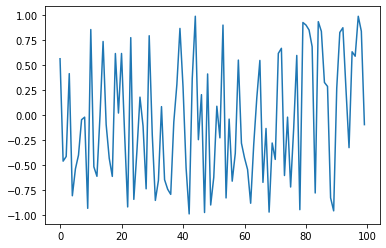

In [54]:
# random 100 float numbers in range [-1, 1]
numbers = np.random.rand(100) * 2 - 1
# plot numbers
import matplotlib.pyplot as plt
plt.plot(numbers)

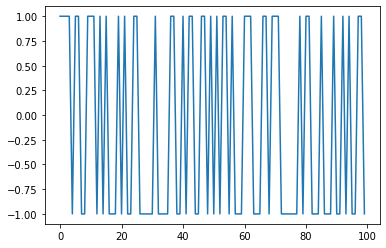

In [53]:
new_numbers = list(map(lambda x: 1 if x >= 0 else -1, numbers))
plt.plot(new_numbers)

In [55]:
numbers = np.random.randint(-99, 100, 20)
# convert negative numbers to positive numbers
positives = list(map(lambda x: -x if x < 0 else x, numbers))
print(numbers)
print(positives)

[-86 -38  -3  69  74  76  15 -30 -90 -66  86  15 -56  25 -95  99  39 -31
 -17  39]
[86, 38, 3, 69, 74, 76, 15, 30, 90, 66, 86, 15, 56, 25, 95, 99, 39, 31, 17, 39]


In [57]:
# Find min among positive numbers, max of negative numbers
print(min(filter(lambda x: x > 0, numbers)))
print(max(filter(lambda x: x < 0, numbers)))

15
-3
